## Observations and Insights

Some Observations:

1. The treatments with the largest inter-quartile variation in the treatments of interest are also those with the lowest final tumor volumes.

2. The average tumor volume of the mice is highly positively correlated with the weight of the mice (pearson correlation coefficient = 0.84, slope of regression line = 0.95).

3. Unless there is an error in my calculations and the data I collected, there are no potential outliers with respect to final tumor volume among any mice for any of the four treatments of interest (although they were formatted to appear as red dots if there were).  This suggests surprising consistency among these treatments.

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

# mouse_metadata.head()
# study_results.head()

df = pd.merge(mouse_metadata, study_results, how='inner', on = 'Mouse ID')
df.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

grouped_df = df.groupby(["Drug Regimen"])
# grouped_df.head()

mean_vol = grouped_df["Tumor Volume (mm3)"].mean()
median_vol = grouped_df["Tumor Volume (mm3)"].median()
variance_vol = grouped_df["Tumor Volume (mm3)"].var()
stdev_vol = grouped_df["Tumor Volume (mm3)"].apply(lambda x: np.std(x, ddof = 0))
sem_vol = grouped_df["Tumor Volume (mm3)"].apply(lambda x: st.sem(x))

summary_stat_df = pd.DataFrame({
    "Mean Tumor Volume": mean_vol,
    "Median Tumor Volume": median_vol,
    "Variance of Tumor Volume": variance_vol,
    "Standard Deviation of Tumor Volume": stdev_vol,
    "SEM Value of Tumor Volume": sem_vol
})

summary_stat_df


Mean Tumor Volume  Median Tumor Volume  \
Drug Regimen                                           
Capomulin             40.675741            41.557809   
Ceftamin              52.591172            51.776157   
Infubinol             52.884795            51.820584   
Ketapril              55.235638            53.698743   
Naftisol              54.331565            52.509285   
Placebo               54.033581            52.288934   
Propriva              52.322552            50.854632   
Ramicane              40.216745            40.673236   
Stelasyn              54.233149            52.431737   
Zoniferol             53.236507            51.818479   

              Variance of Tumor Volume  Standard Deviation of Tumor Volume  \
Drug Regimen                                                                 
Capomulin                    24.947764                            4.983904   
Ceftamin                     39.290177                            6.250556   
Infubinol                    43.128684                            6.548770   
Ketapril                     68.553577                            8.257659   
Naftisol                     66.173479                            8.112811   
Placebo                      61.168083                            7.799368   
Propriva                     42.351070                            6.487528   
Ramicane                     23.486704                            4.835669   
Stelasyn                     59.450562                            7.689090   
Zoniferol                    48.533355                            6.947423   

              SEM Value of Tumor Volume  
Drug Regimen                             
Capomulin                      0.329346  
Ceftamin                       0.469821  
Infubinol                      0.492236  
Ketapril                       0.603860  
Naftisol                       0.596466  
Placebo                        0.581331  
Propriva                       0.512884  
Ramicane                       0.320955  
Stelasyn                       0.573111  
Zoniferol                      0.516398

## Bar plots

Text(0, 0.5, 'Data Points')

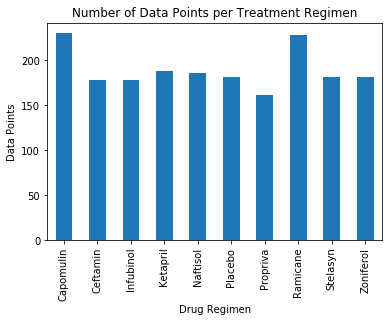

In [11]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

counts = grouped_df["Mouse ID"].count()
# counts
counts.tolist()

count_plot = counts.plot.bar(title="Number of Data Points per Treatment Regimen")
count_plot.set_ylabel("Data Points")

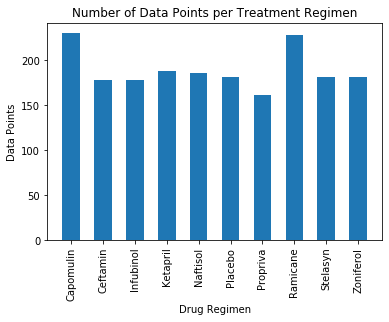

In [14]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

grouped_df.count()["Mouse ID"]

plt.bar(counts.axes[0], counts.tolist(), width=0.55)
plt.xticks(rotation=90)
plt.title("Number of Data Points per Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")
plt.show()

## Pie plots

Text(0, 0.5, '')

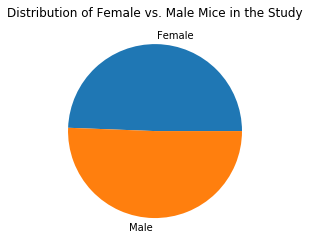

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_group = df.groupby(["Sex"])
gender_group.count()

plot = gender_group.count()["Mouse ID"].plot.pie(title="Distribution of Female vs. Male Mice in the Study")
plot.set_ylabel("")

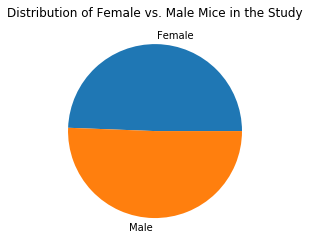

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(gender_group.count()["Mouse ID"].tolist(), labels=["Female", "Male"])
plt.title("Distribution of Female vs. Male Mice in the Study")
plt.show()

## Quartiles, outliers and boxplots

In [32]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


df_values = df.values
df_values[0][1]

treatments = ["Capomulin", "Ceftamin", "Infubinol", "Ramicane"]
final_vols = {}

for treatment in treatments:
    final_vols[treatment] = []
    for x in range(0, len(df_values)):
        if df_values[x][1] == treatment and df_values[x][5] == 20:
            final_vols[treatment].append(df_values[x][6])


            
# all_weights = []

# for treatment in treatments:
#     for weight in final_weights[treatment]:
#         all_weights.append(weight)


# weights_df = pd.DataFrame(all_weights)[0]

cap_volume = []
cef_volume = []
inf_volume = []
ram_volume = []

for treatment in treatments:
    for volume in final_vols[treatment]:
        if treatment == "Capomulin":
            cap_volume.append(volume)
        elif treatment == "Ceftamin":
            cef_volume.append(volume)
        elif treatment == "Infubinol":
            inf_volume.append(volume)
        elif treatment == "Ramicane":
            ram_volume.append(volume)
        else:
            print(treatment)
            
            
cap_df = pd.DataFrame(cap_volume)[0]
cef_df = pd.DataFrame(cef_volume)[0]
inf_df = pd.DataFrame(inf_volume)[0]
ram_df = pd.DataFrame(ram_volume)[0]

cap_quartiles = cap_df.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq

print(f"The interquartile range of final tumor volume for the Capomulin treatment is: {cap_iqr}")

cap_outliers = []

# print(cap_quartiles)
# print(cap_lowerq - (1.5*cap_iqr))
# print(cap_volume)

for volume in cap_volume:
    if (volume < (cap_lowerq - (1.5*cap_iqr))) or (volume > (cap_upperq + (1.5*cap_iqr))):
        cap_outliers.append(weight)
        
print(f"There are {len(cap_outliers)} potential Capomulin outliers")
print()


cef_quartiles = cef_df.quantile([.25,.5,.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq-cef_lowerq


print(f"The interquartile range of final tumor volume for the Ceftamin treatment is: {cef_iqr}")


cef_outliers = []

for weight in cef_weights:
    if (weight < (cef_lowerq - (1.5*cef_iqr))) or (weight > (cef_upperq + (1.5*cef_iqr))):
        cef_outliers.append(weight)
        
print(f"There are {len(cef_outliers)} potential Ceftamin outliers")
print()


inf_quartiles = inf_df.quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq


print(f"The interquartile range of final tumor volume for the Infubinol treatment is: {inf_iqr}")


inf_outliers = []

for weight in inf_weights:
    if (weight < (inf_lowerq - (1.5*inf_iqr))) or (weight > (inf_upperq + (1.5*inf_iqr))):
        inf_outliers.append(weight)
        
print(f"There are {len(inf_outliers)} potential Infubinol outliers")
print()




ram_quartiles = ram_df.quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq


print(f"The interquartile range of final tumor volume for the Ramicane treatment is: {ram_iqr}")

ram_outliers = []

for weight in ram_weights:
    if (weight < (ram_lowerq - (1.5*ram_iqr))) or (weight > (ram_upperq + (1.5*ram_iqr))):
        ram_outliers.append(weight)
        
print(f"There are {len(ram_outliers)} potential Ramicane outliers")



The interquartile range of final tumor volume for the Capomulin treatment is: 5.3560372749999985
There are 0 potential Capomulin outliers

The interquartile range of final tumor volume for the Ceftamin treatment is: 2.215460387500002
There are 0 potential Ceftamin outliers

The interquartile range of final tumor volume for the Infubinol treatment is: 2.9060958724999963
There are 0 potential Infubinol outliers

The interquartile range of final tumor volume for the Ramicane treatment is: 5.462883935000001
There are 0 potential Ramicane outliers


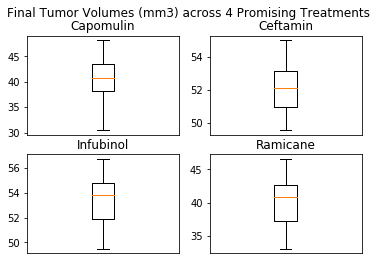

In [33]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Final Tumor Volumes (mm3) across 4 Promising Treatments')
ax1.boxplot(cap_df, sym="r.")
ax1.set_title("Capomulin")
ax1.set_xticks([])
ax2.boxplot(cef_df, sym="r.")
ax2.set_title("Ceftamin")
ax2.set_xticks([])
ax3.boxplot(inf_df, sym="r.")
ax3.set_title("Infubinol")
ax3.set_xticks([])
ax4.boxplot(ram_df, sym="r.")
ax4.set_title("Ramicane")
ax4.set_xticks([])
plt.show()

## Line and scatter plots

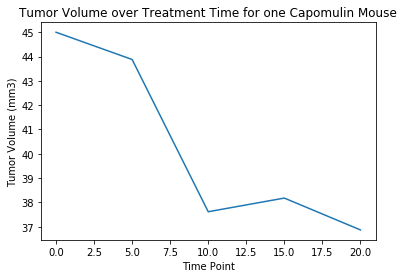

In [24]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

cap_df = df.loc[df["Drug Regimen"] == "Capomulin"]
cap_sample = cap_df[:5].values
cap_sample
times = [cap_sample[x][-3] for x in range(0, len(cap_sample))]
volumes = [cap_sample[x][-2] for x in range(0, len(cap_sample))]
plt.plot(times, volumes)
plt.title("Tumor Volume over Treatment Time for one Capomulin Mouse")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

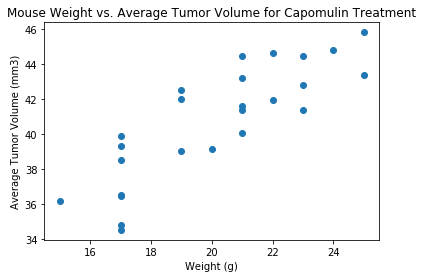

In [25]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

cap_mean_df = cap_df.groupby("Mouse ID").mean()
cap_mean = cap_mean_df.values
weights = [cap_mean[x][1] for x in range(0, len(cap_mean))]
volumes = [cap_mean[x][-2] for x in range(0, len(cap_mean))]
plt.scatter(weights, volumes)
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Treatment")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

The correlation between both factors is 0.84
y = 0.95x + 21.55


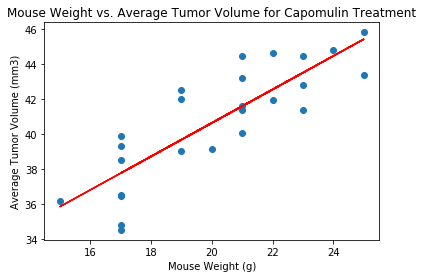

In [26]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

# correlation:

correlation = st.pearsonr(weights, volumes)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# regression:

from scipy.stats import linregress

(slope, intercept, rvalue, pvalue, stderr) = linregress(weights, volumes)
regress_values = [weight * slope + intercept for weight in weights]
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# line_eq
print(line_eq)
plt.scatter(weights,volumes)
plt.plot(weights,regress_values,"r-")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Treatment")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()